Импорт библиотек

In [429]:
import collections

counter = collections.Counter()
for i in range(1, 7):
  for j in range(1, 7):
    counter[i * max(i, j)] += 1

print({ value : counter[value] / 36. for value in counter })

sumc = 0
for value in counter:
    sumc += value * counter[value]
print(sumc)

{1: 0.027777777777777776, 2: 0.027777777777777776, 3: 0.027777777777777776, 4: 0.08333333333333333, 5: 0.027777777777777776, 6: 0.05555555555555555, 8: 0.027777777777777776, 10: 0.027777777777777776, 12: 0.05555555555555555, 9: 0.08333333333333333, 15: 0.027777777777777776, 18: 0.027777777777777776, 16: 0.1111111111111111, 20: 0.027777777777777776, 24: 0.027777777777777776, 25: 0.1388888888888889, 30: 0.027777777777777776, 36: 0.16666666666666666}
616


In [159]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

# 0. Применение полиномиальной регрессии для предсказания непрерывного параметра

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке <code>Species</code>. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [344]:
file_path = 'C:/Users/Соня/OneDrive/Рабочий стол/jupyter/ml_online_course/lin_regr/fish_train.csv'
df = pd.read_csv(file_path)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


In [345]:
X_train, X_test, y_train, y_test = train_test_split(df, df['Weight'], test_size=0.2, stratify=df['Species'], random_state=9)
len(X_test)

24

Вычислите выборочное среднее колонки <code>Width</code> полученной тренировочной выборки.

In [346]:
print(round(y_train.mean(), 3))
X_train.mean()

380.573


C:\Users\Соня\AppData\Local\Temp\ipykernel_1808\4118333275.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.mean()


Weight     380.572632
Length1     26.046316
Length2     28.189474
Length3     30.976842
Height       8.916377
Width        4.435089
dtype: float64

In [347]:
X_train_cat = pd.get_dummies(X_train['Species'], drop_first=True)#необходимо для будущего задания
X_test_cat = pd.get_dummies(X_test['Species'], drop_first=True)
X_train_cat

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
24,0,0,0,0,0,0
72,0,0,0,1,0,0
46,0,0,0,1,0,0
55,0,0,1,0,0,0
36,0,0,0,0,1,0
...,...,...,...,...,...,...
35,0,0,1,0,0,0
79,0,1,0,0,0,0
49,1,0,0,0,0,0
47,0,0,0,0,0,0


# 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

In [349]:
X_train.info() # Ищем категориальные признаки
X_train.drop(['Species', 'Weight'], axis=1, inplace=True) #df.drop(['B', 'C'], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 24 to 92
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  95 non-null     object 
 1   Weight   95 non-null     float64
 2   Length1  95 non-null     float64
 3   Length2  95 non-null     float64
 4   Length3  95 non-null     float64
 5   Height   95 non-null     float64
 6   Width    95 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 24 to 92
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Length1  95 non-null     float64
 1   Length2  95 non-null     float64
 2   Length3  95 non-null     float64
 3   Height   95 non-null     float64
 4   Width    95 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB


In [350]:
X_test.drop(['Species', 'Weight'], axis=1, inplace=True)

In [351]:
simple_lr = LinearRegression()
simple_lr.fit(X_train,y_train)
predicted_y = simple_lr.predict(X_test)

In [352]:
 round(r2_score(y_test, predicted_y), 3)

0.839

# 2. Добавление предварительной обработки признаков.

## Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

<AxesSubplot:>

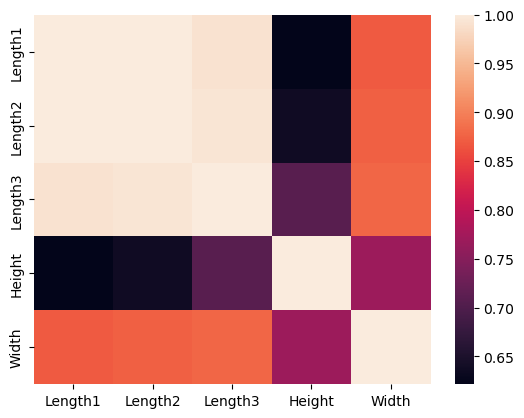

In [353]:
sns.heatmap(X_train.corr())
# Lenght1, Lenght2, Lenght3 - наиболее коррелированны между собой

Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент. 

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков. 

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты. 

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [354]:
correlated_features = X_train[['Length1', 'Length2', 'Length3']]
pca = PCA(n_components=3, svd_solver='full')
principal_components = pca.fit_transform(correlated_features)
pca.explained_variance_ratio_[0]

0.9960262957484168

In [355]:
X_train['Lengths'] = principal_components[:, 0]
X_train = X_train.drop(columns=['Length1', 'Length2', 'Length3'])

Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [356]:
correlated_features = X_test[['Length1', 'Length2', 'Length3']]
principal_components = pca.transform(correlated_features)
pca.explained_variance_ratio_[0]
X_test['Lengths'] = principal_components[:, 0]
X_test = X_test.drop(columns=['Length1', 'Length2', 'Length3'])

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

In [357]:
simple_lr = LinearRegression()
simple_lr.fit(X_train,y_train)
predicted_y = simple_lr.predict(X_test)

In [358]:
 round(r2_score(y_test, predicted_y), 3)

0.833

Видно, что точность значительно не изменилась.

## Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи <code>sns.pairplot()</code>.

In [359]:
X_train['Weight'] = y_train
X_train

,Height,Width,Lengths,Weight
24,14.3714,4.8146,6.271429,500.0
72,9.4850,5.3550,6.356849,390.0
46,5.6166,3.1746,-14.454194,87.0
55,7.6800,5.3760,33.940884,770.0
36,2.2139,1.2838,-28.379066,10.0
...,...,...,...,...
35,8.9262,6.1712,40.354843,950.0
79,7.0516,4.3350,-2.029335,265.0
49,9.7364,3.1571,-11.444533,145.0
47,12.7300,4.4555,2.165520,363.0


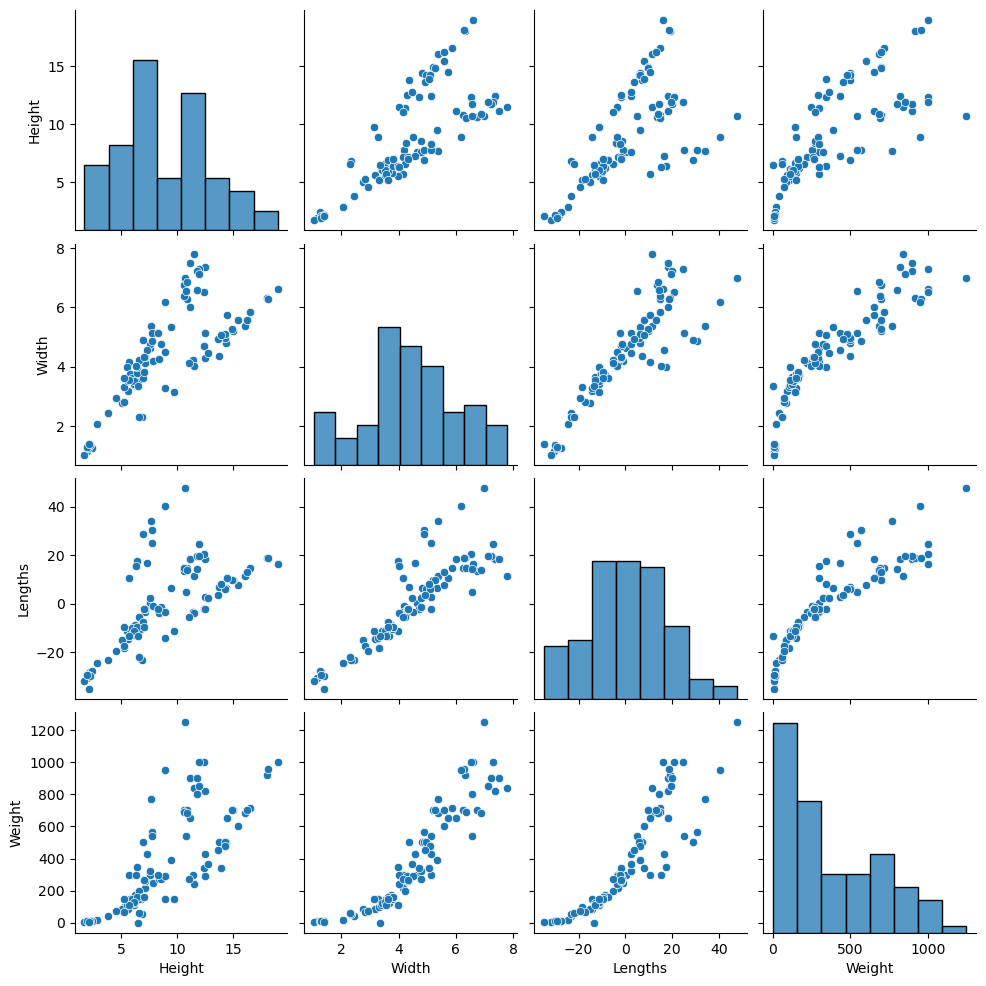

In [360]:
sns.pairplot(X_train)

Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

In [361]:
X_train[['Height', 'Width', 'Lengths']] = X_train[['Height', 'Width', 'Lengths']] ** 3

Введите выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [362]:
round(X_train['Width'].mean(), 3)

121.365

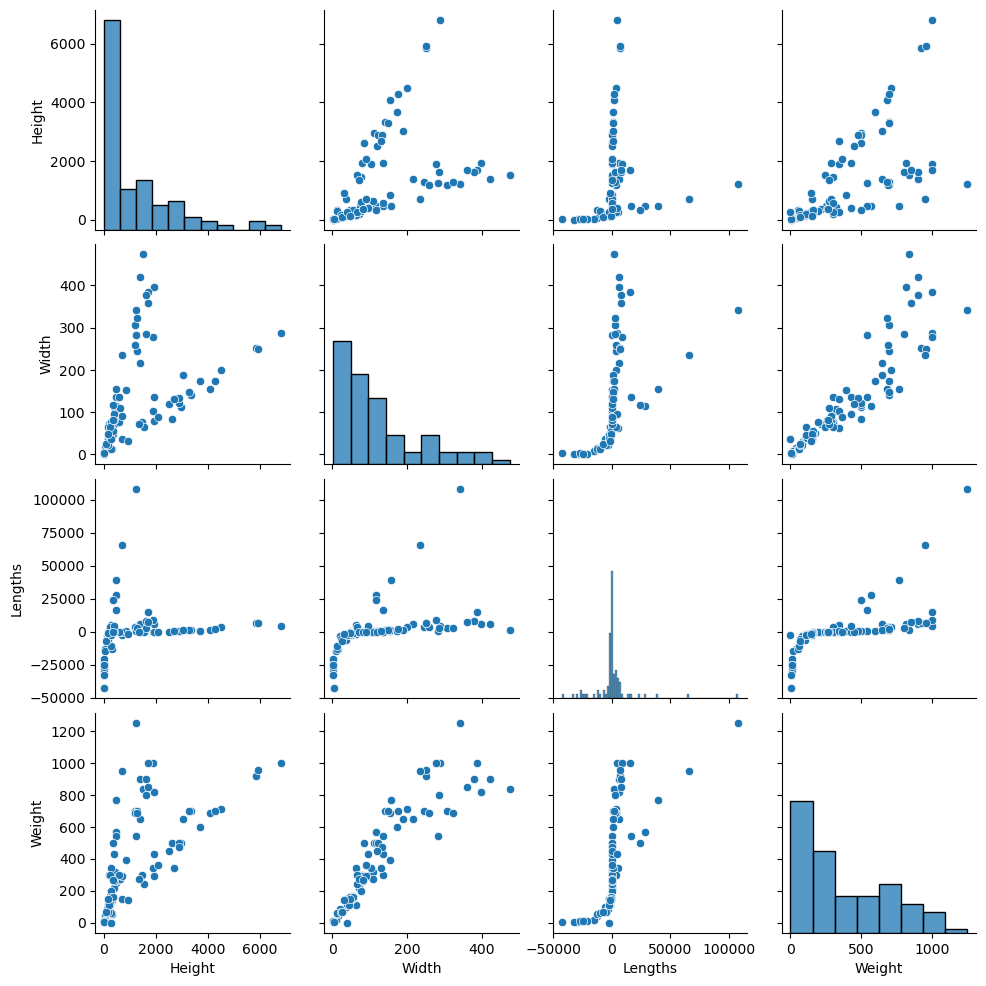

In [363]:
sns.pairplot(X_train)

Выберите изображения, соответствующие зависимости <code>Weight</code> от <code>Width</code> до преобразования и после.

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи `r2_score()`.

In [364]:
X_test[['Height', 'Width', 'Lengths']] = X_test[['Height', 'Width', 'Lengths']] ** 3

In [365]:
simple_lr = LinearRegression()
simple_lr.fit(X_train[['Height', 'Width', 'Lengths']],y_train)
predicted_y = simple_lr.predict(X_test)
round(r2_score(y_test, predicted_y), 3)

0.943

Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

## Добавление категориальных признаков

Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

<b>Примечание</b>: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака <code>Species</code> присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, [например, здесь](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [ ]:
X_train_with_cat = X_train[['Height', 'Width', 'Lengths']].join(X_train_cat)
X_test_with_cat = X_test[['Height', 'Width', 'Lengths']].join(X_test_cat)

In [ ]:
simple_lr = LinearRegression()
simple_lr.fit(X_train_with_cat,y_train)
predicted_y = simple_lr.predict(X_test_with_cat)
round(r2_score(y_test, predicted_y), 3)

Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.

Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. В качестве метрики используется r2_score.

In [391]:
file_path = 'C:/Users/Соня/OneDrive/Рабочий стол/jupyter/ml_online_course/lin_regr/fish_reserved.csv'
df_ro = pd.read_csv(file_path)
df_ro

,Species,Length1,Length2,Length3,Height,Width
0,Roach,19.4,21.0,23.7,6.1146,3.2943
1,Perch,19.3,21.3,22.8,6.3840,3.5340
2,Perch,17.2,19.0,20.2,5.6358,3.0502
3,Parkki,17.5,19.0,21.3,8.3922,2.9181
4,Parkki,16.3,17.7,19.8,7.4052,2.6730
5,Perch,22.0,24.0,25.5,7.2930,3.7230
6,Perch,15.0,16.2,17.2,4.5924,2.6316
7,Pike,40.0,42.5,45.5,6.8250,4.4590
8,Bream,27.6,30.0,35.0,12.6700,4.6900
9,Roach,18.6,20.0,22.2,6.2160,3.5742


# Выполнение 3 задания

In [393]:
file_path = 'C:/Users/Соня/OneDrive/Рабочий стол/jupyter/ml_online_course/lin_regr/fish_reserved.csv'
df_r = pd.read_csv(file_path)
df_r
df_r_cat = pd.get_dummies(df_r['Species'], drop_first=True)

In [398]:
df_r_cat.head(5)

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [396]:
#df_r.head(5)
df_r = df_r.drop(columns=['Species'])
df_r.head(5)

,Length1,Length2,Length3,Height,Width
0,19.4,21.0,23.7,6.1146,3.2943
1,19.3,21.3,22.8,6.3840,3.5340
2,17.2,19.0,20.2,5.6358,3.0502
3,17.5,19.0,21.3,8.3922,2.9181
4,16.3,17.7,19.8,7.4052,2.6730


In [399]:
correlated_features = df_r[['Length1', 'Length2', 'Length3']]
pca = PCA(n_components=3, svd_solver='full')
principal_components = pca.fit_transform(correlated_features)
pca.explained_variance_ratio_[0]

0.9975288672371171

In [400]:
df_r['Lengths'] = principal_components[:, 0]
df_r = df_r.drop(columns=['Length1', 'Length2', 'Length3'])

In [402]:
df_r.head()

,Height,Width,Lengths
0,6.1146,3.2943,-10.713320
1,6.3840,3.5340,-11.157506
2,5.6358,3.0502,-15.213579
3,8.3922,2.9181,-14.366622
4,7.4052,2.6730,-16.685145


In [403]:
df_r[['Height', 'Width', 'Lengths']] = df_r[['Height', 'Width', 'Lengths']] ** 3

In [412]:
df_r.join(df_r_cat).head(5)
cols = ['Parkki', 'Perch', 'Pike', 'Roach', 'Smelt','Whitefish']
df_r['combined'] = df_r_cat[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [413]:
df_r.head(5)

,Height,Width,Lengths,combined
0,228.614702,35.751102,-1229.623711,0_0_0_1_0_0
1,260.182831,44.136677,-1388.997359,0_1_0_0_0_0
2,179.005641,28.378207,-3521.228273,0_1_0_0_0_0
3,591.054429,24.848519,-2965.268241,1_0_0_0_0_0
4,406.078856,19.098395,-4645.044937,1_0_0_0_0_0


Объединим наши данные

In [373]:
df_concat = pd.concat([X_train_with_cat, X_test_with_cat])
df_concat = pd.DataFrame(df_concat)
df_concat

,Height,Width,Lengths,Parkki,Perch,Pike,Roach,Smelt,Whitefish
24,2968.227824,111.604225,246.660404,0,0,0,0,0,0
72,853.320159,153.560114,256.877230,0,0,0,1,0,0
46,177.182362,31.993889,-3019.823898,0,0,0,1,0,0
55,452.984832,155.373797,39099.343371,0,0,1,0,0,0
36,10.851106,2.115885,-22855.688666,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
88,2746.882209,113.647166,86.762636,0,0,0,0,0,0
99,172.622610,38.463866,320.653728,0,0,1,0,0,0
66,427.706666,56.411033,-330.037912,0,0,0,1,0,0
82,884.736000,231.928234,164168.722209,0,0,1,0,0,0


In [414]:
cols = ['Parkki', 'Perch', 'Pike', 'Roach', 'Smelt','Whitefish']
df_concat['combined'] = df_concat[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [418]:
df_concat = df_concat.drop(columns=cols)
df_concat

,Height,Width,Lengths,combined
24,2968.227824,111.604225,246.660404,0_0_0_0_0_0
72,853.320159,153.560114,256.877230,0_0_0_1_0_0
46,177.182362,31.993889,-3019.823898,0_0_0_1_0_0
55,452.984832,155.373797,39099.343371,0_0_1_0_0_0
36,10.851106,2.115885,-22855.688666,0_0_0_0_1_0
...,...,...,...,...
88,2746.882209,113.647166,86.762636,0_0_0_0_0_0
99,172.622610,38.463866,320.653728,0_0_1_0_0_0
66,427.706666,56.411033,-330.037912,0_0_0_1_0_0
82,884.736000,231.928234,164168.722209,0_0_1_0_0_0


In [375]:
df_concat_y = pd.concat([y_train, y_test])
df_concat_y = pd.DataFrame(df_concat_y)
df_concat_y

,Weight
24,500.0
72,390.0
46,87.0
55,770.0
36,10.0
...,...
88,450.0
99,200.0
66,169.0
82,1550.0


In [421]:
simple_lr = LinearRegression()
simple_lr.fit(df_concat, df_concat_y)
predicted_y = simple_lr.predict(df_r)
predicted_y.T

array([[ 173.73072083,  184.27924768,  140.92742271,  123.71320532,
          93.3919064 ,  210.75336962,   94.15409997,  377.46450364,
         401.46273178,  186.23492187, 2279.33312901,  201.81422511,
         613.37367663, 1077.7442991 ,   37.39708551,  589.13839692,
         182.47710268,  814.61228933, 1577.66538755,  141.62798621,
         569.79504202,  247.44669149,  138.32424453,  210.29806772,
         275.03589024,  609.31504486,  318.44665941,    6.37292692,
          60.26287416,  -33.30080386,  952.1838834 ,  522.49978727,
         541.31202812,  171.09199436,   17.30094979,  141.05552553,
         182.65028847,  960.97955005,  754.95482473,  190.18911088]])

In [390]:
[ 118.42417049,  170.45443729,  127.93486318,  126.19533908,
          95.24234634,  197.34956902,   83.3783084 ,  445.61661017,
         382.59364563,  131.45000748, 2202.15735782,  187.11978659,
         606.47748163, 1059.43980248,   30.47221691,  585.14752655,
         127.22013787,  818.93763428, 1541.96997777,  127.75678635,
         567.26484779,  192.75538033,  125.36070499,  195.55921512,
         352.44183301,  598.82192306,  369.92125401,   41.37760531,
          89.99824014,    6.02038518,  955.26436878,  511.23180606,
         534.59141811,  174.75501615,   50.95424586,   86.58790324,
         167.98741333,  951.29530068,  755.86882853,  175.29980623]
         
         

40

In [ ]:
simple_lr = LinearRegression()
simple_lr.fit(df_concat, df_concat_y)
predicted_y = simple_lr.predict(df_r.join(df_r_cat))
predicted_y.T